In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import libs.local
import matplotlib.pyplot
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import xarray

In [3]:
experiment = 'ssp585'
key = 'Ensemble mean'
seasons = ['DJF', 'MAM', 'JJA', 'SON']
region = 'Central'
si_var = 'sithick'

kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': '_delta_1980-2010'
}
si_data = libs.local.get_ensemble_series(si_var, **kwargs)[key]
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]


def filter_season_plot(period, siconc, tas, pr, prra, prsn, title=''):
    siconc = siconc.where(siconc.time['time.season'] == period)
    tas = tas.where(tas.time['time.season'] == period)
    pr = pr.where(pr.time['time.season'] == period)
    prra = prra.where(prra.time['time.season'] == period)
    prsn = prsn.where(prsn.time['time.season'] == period)
    
    plot(siconc, tas, pr, prra, prsn, title)

    
def plot(siconc, tas, pr, prra, prsn, title=''):
    fig, axs = matplotlib.pyplot.subplots(2, 5, figsize=(12,6))
    axs = axs.flatten()
    axs[0].scatter(siconc, tas); axs[0].set_xlabel(si_var); axs[0].set_ylabel('tas')
    axs[1].scatter(siconc, prsn); axs[1].set_xlabel(si_var); axs[1].set_ylabel('prsn')
    axs[2].scatter(siconc, prra); axs[2].set_xlabel(si_var); axs[2].set_ylabel('prra')
    axs[3].scatter(siconc, pr); axs[3].set_xlabel(si_var); axs[3].set_ylabel('pr')
    axs[4].scatter(siconc, evspsbl); axs[4].set_xlabel(si_var); axs[4].set_ylabel('evspsbl')

    axs[6].scatter(tas, prsn); axs[6].set_xlabel('tas'); axs[6].set_ylabel('prsn')
    axs[7].scatter(tas, prra); axs[7].set_xlabel('tas'); axs[7].set_ylabel('prra')
    axs[8].scatter(tas, pr); axs[8].set_xlabel('tas'); axs[8].set_ylabel('pr')
    axs[9].scatter(tas, evspsbl); axs[9].set_xlabel('tas'); axs[9].set_ylabel('evspsbl')

    fig.suptitle(title)
    fig.tight_layout()


'''tas_abs = libs.local.get_ensemble_series('tas', **kwargs)[key]
mask = tas_abs > 0
siconc = siconc.where(mask)
tas = tas.where(mask)
pr = pr.where(mask)
prra = prra.where(mask)
prsn = prsn.where(mask)''';

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sithick   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     953.1
Date:                Mon, 30 May 2022   Prob (F-statistic):          6.49e-265
Time:                        09:05:10   Log-Likelihood:                -1654.1
No. Observations:                1452   AIC:                             3314.
Df Residuals:                    1449   BIC:                             3330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8542      0.027    -31.084      0.000      -0.908      -0.800
tas           -0.0901      0.003    -34.885      0.000      -0.095      -0.085
prra          -0.7603      0.061    -12.536      0.000      -0.879      -0.641
==============================================================================
Omnibus:                      188.648   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.638
Skew:                           0.015   Prob(JB):                     2.74e-11
Kurtosis:                       2.104   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

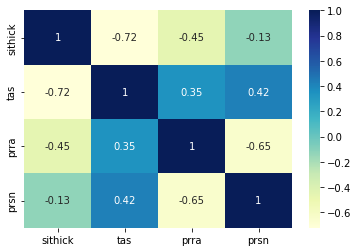

In [4]:
data = pd.DataFrame({
    (si_var): si_data.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

model = smf.ols(formula=f'{si_var} ~ tas + prra', data=data).fit()
model.summary()

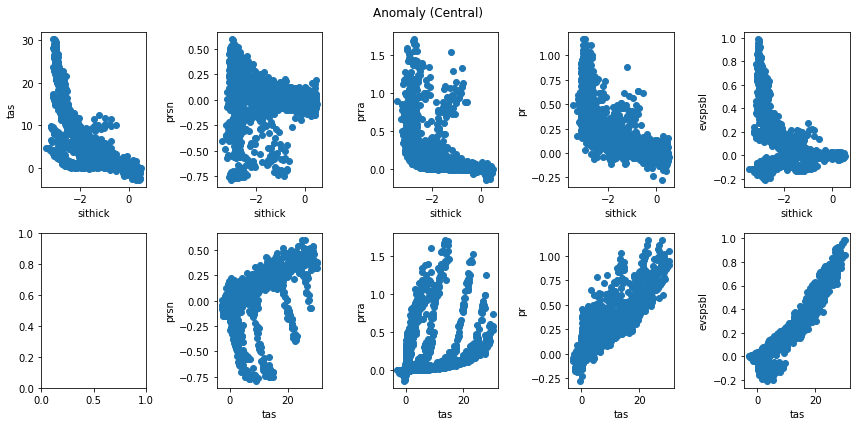

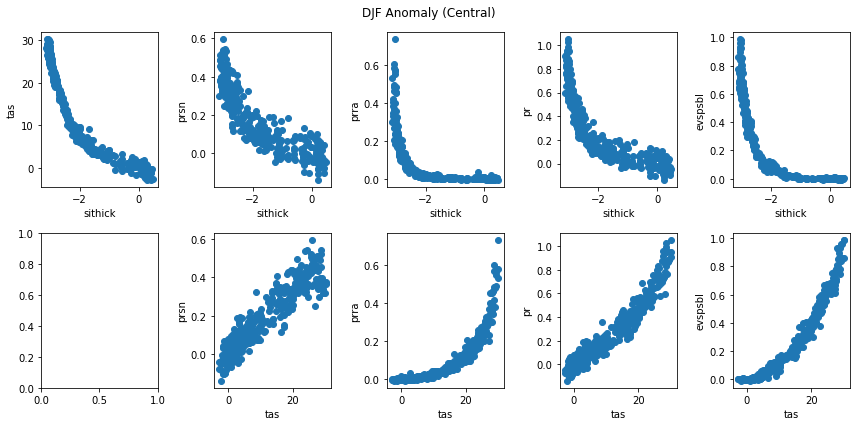

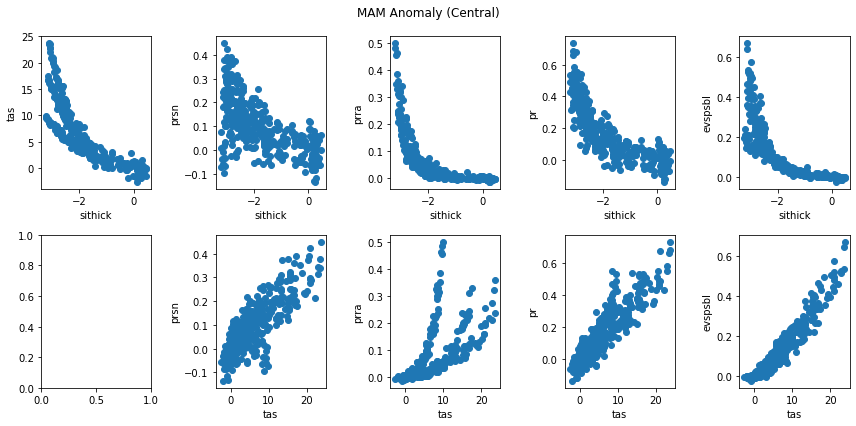

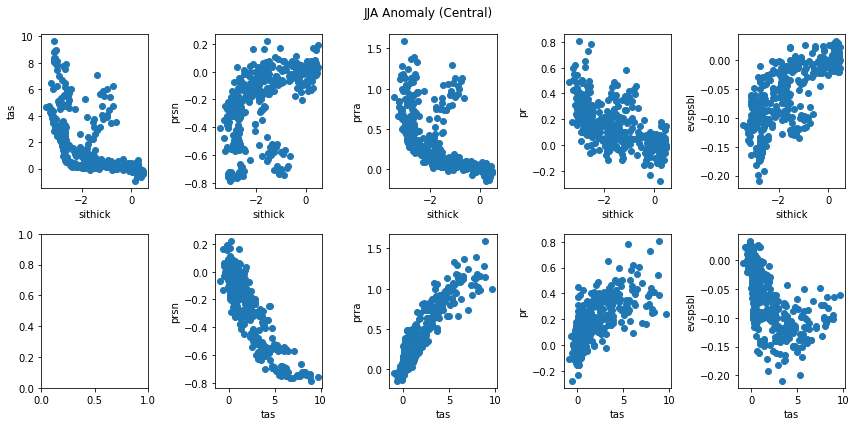

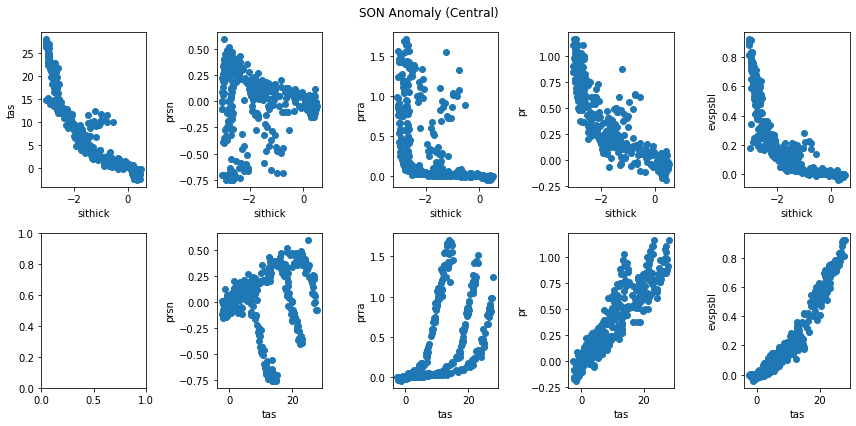

In [5]:
plot(si_data, tas, pr, prra, prsn, title=f'Anomaly ({region})')

[filter_season_plot(s, si_data, tas, pr, prra, prsn, title=f'{s} Anomaly ({region})') for s in seasons];

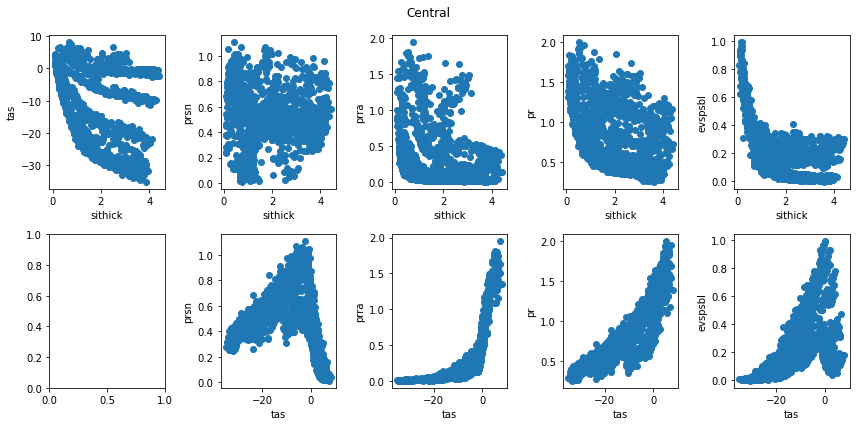

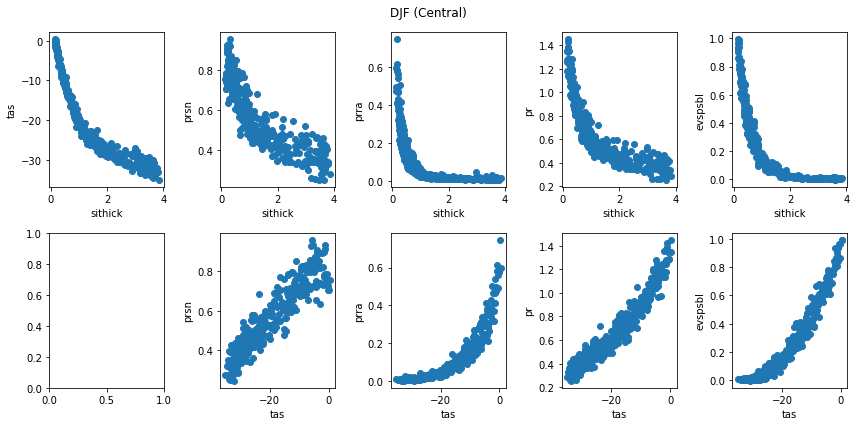

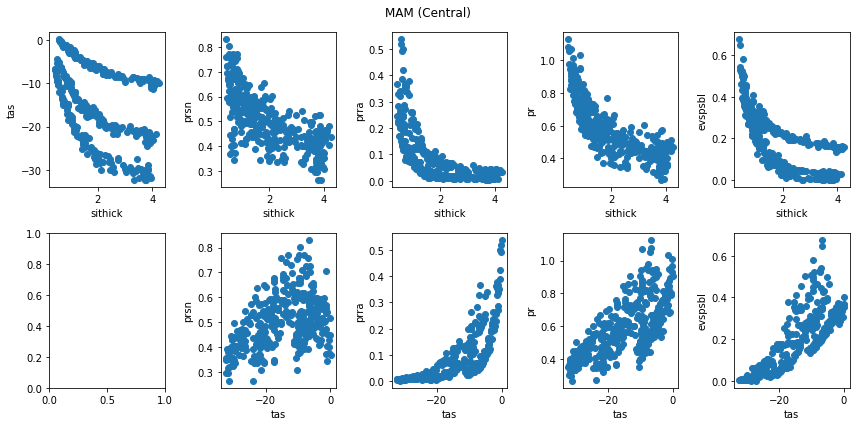

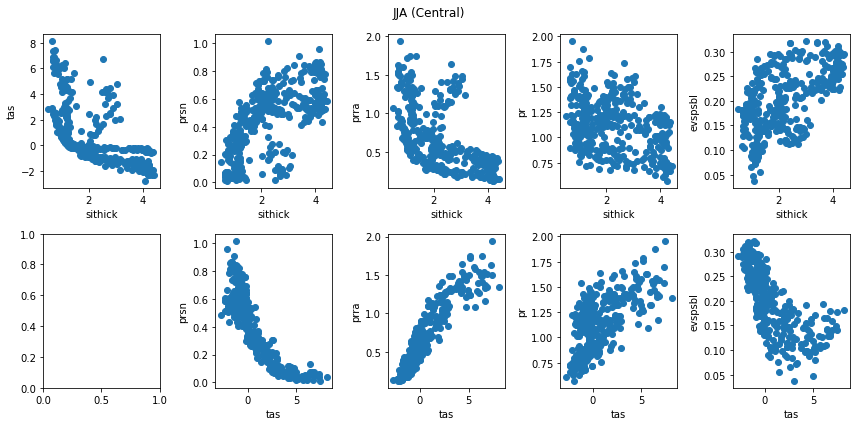

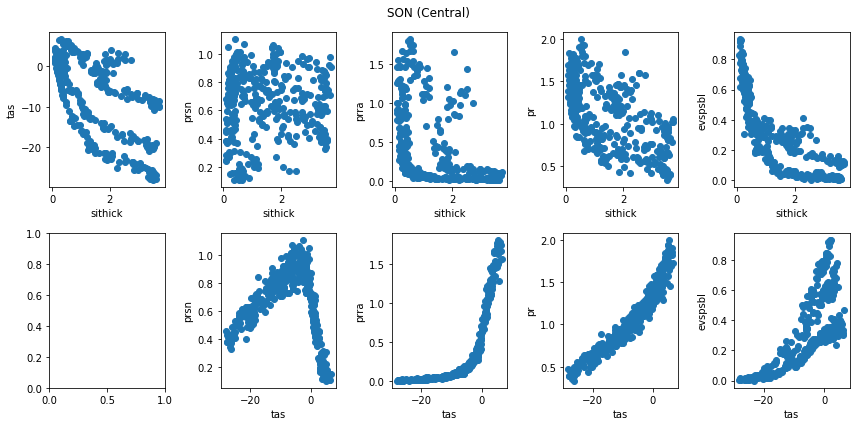

In [6]:
kwargs = {
    'experiment': experiment,
    'region': region,
    'suffix': ''
}
si_data = libs.local.get_ensemble_series(si_var, **kwargs)[key]
tas = libs.local.get_ensemble_series('tas', **kwargs)[key]
evspsbl = libs.local.get_ensemble_series('evspsbl', **kwargs)[key]
pr = libs.local.get_ensemble_series('pr', **kwargs)[key]
prra = libs.local.get_ensemble_series('prra', **kwargs)[key]
prsn = libs.local.get_ensemble_series('prsn', **kwargs)[key]

plot(si_data, tas, pr, prra, prsn, title=region)

[filter_season_plot(s, si_data, tas, pr, prra, prsn, title=f'{s} ({region})') for s in seasons];

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sithick   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.24e-42
Time:                        09:05:22   Log-Likelihood:                -2222.1
No. Observations:                1452   AIC:                             4450.
Df Residuals:                    1449   BIC:                             4466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6039      0.073     21.825      0.000       1.460       1.748
tas           -0.0294      0.004     -7.838      0.000      -0.037      -0.022
prra          -0.2643      0.103     -2.566      0.010      -0.466      -0.062
==============================================================================
Omnibus:                      125.454   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.518
Skew:                           0.570   Prob(JB):                     3.32e-23
Kurtosis:                       2.358   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

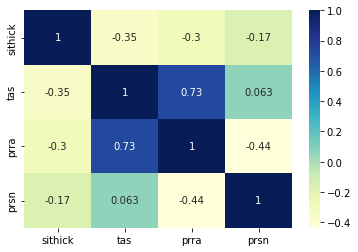

In [7]:
data = pd.DataFrame({
    (si_var): si_data.data,
    'tas': tas.data,
    'prra': prra.data,
    'prsn': prsn.data
})

sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

model = smf.ols(formula=f'{si_var} ~ tas + prra', data=data).fit()
model.summary()

In [8]:
model = smf.ols(formula=f'{si_var} ~ tas + prra + prsn', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sithick   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     119.0
Date:                Mon, 30 May 2022   Prob (F-statistic):           7.21e-69
Time:                        09:05:22   Log-Likelihood:                -2158.8
No. Observations:                1452   AIC:                             4326.
Df Residuals:                    1448   BIC:                             4347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4541      0.176     19.643      0.000       3.109       3.799
tas            0.0029      0.005      0.636      0.525      -0.006       0.012
prra          -1.3885      0.139     -9.991      0.000      -1.661      -1.116
prsn          -2.1419      0.187    -11.481      0.000      -2.508      -1.776
==============================================================================
Omnibus:                      123.297   Durbin-Watson:                   0.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.301
Skew:                           0.698   Prob(JB):                     1.87e-29
Kurtosis:                       2.512   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""